In [15]:

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset from processed folder
df = pd.read_csv("../data/processed/cleaned_retail.csv")

# Display first few rows to confirm data is loaded
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [16]:
# Check number of rows and columns
df.shape

# Check column names and data types
df.info()

# Check for missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392693 entries, 0 to 392692
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392693 non-null  int64  
 1   StockCode    392693 non-null  object 
 2   Description  392693 non-null  object 
 3   Quantity     392693 non-null  int64  
 4   InvoiceDate  392693 non-null  object 
 5   UnitPrice    392693 non-null  float64
 6   CustomerID   392693 non-null  float64
 7   Country      392693 non-null  object 
 8   TotalSales   392693 non-null  float64
 9   Year         392693 non-null  int64  
 10  Month        392693 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 33.0+ MB


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSales     0
Year           0
Month          0
dtype: int64

In [17]:
# Calculate total revenue generated
total_revenue = df["TotalSales"].sum()

# Calculate total number of transactions (unique invoices)
total_transactions = df["InvoiceNo"].nunique()

# Calculate total number of unique customers
total_customers = df["CustomerID"].nunique()

# Print KPIs
print("Total Revenue:", total_revenue)
print("Total Transactions:", total_transactions)
print("Total Customers:", total_customers)


Total Revenue: 8887226.894000001
Total Transactions: 18532
Total Customers: 4338


In [18]:
# Summary statistics of sales amount
df["TotalSales"].describe()


count    392693.000000
mean         22.631488
std         311.098828
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: TotalSales, dtype: float64

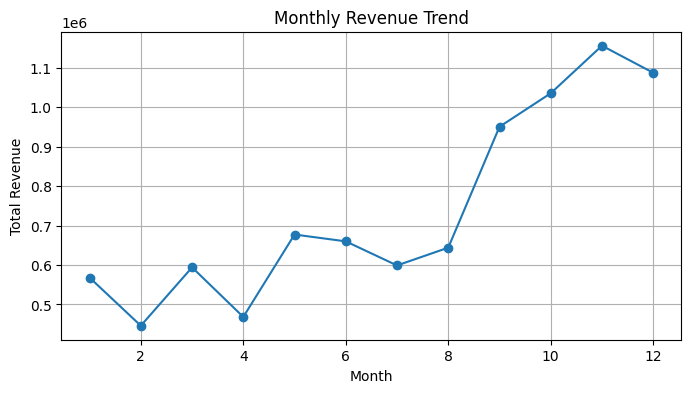

In [19]:
# Group data by month and calculate total sales
monthly_sales = df.groupby("Month")["TotalSales"].sum()

# Plot monthly sales trend
plt.figure(figsize=(8,4))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()


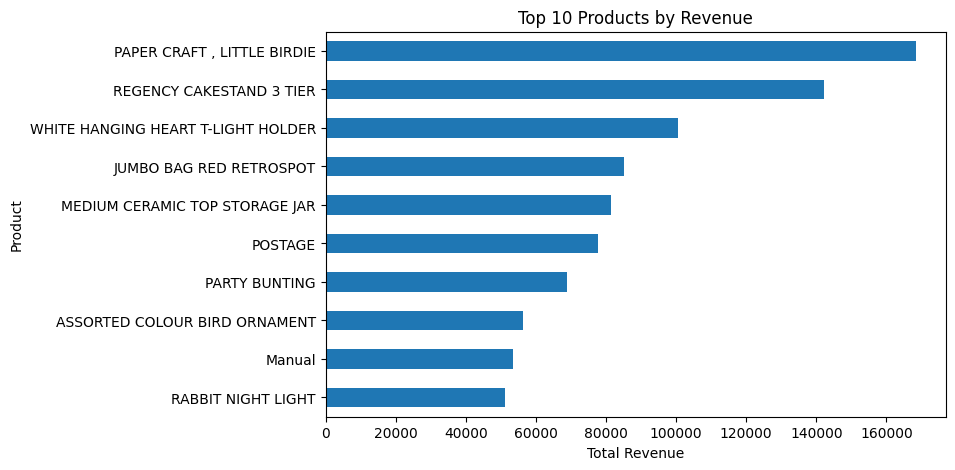

In [20]:
# Calculate total revenue per product
top_products = (
    df.groupby("Description")["TotalSales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot top 10 products
plt.figure(figsize=(8,5))
top_products.plot(kind="barh")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.gca().invert_yaxis()
plt.show()


In [21]:
# Calculate total spending per customer
top_customers = (
    df.groupby("CustomerID")["TotalSales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Display top customers
top_customers


CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: TotalSales, dtype: float64

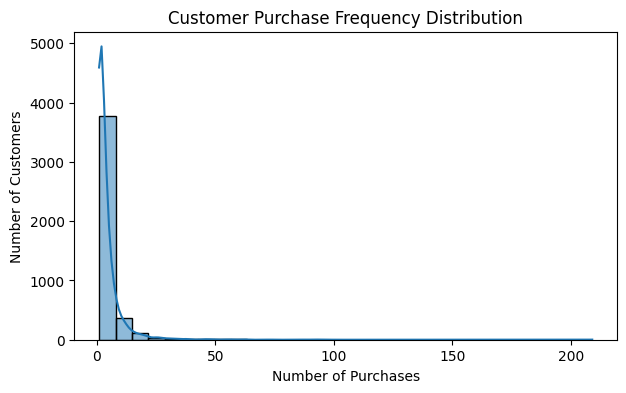

In [22]:
# Count number of invoices per customer
customer_frequency = df.groupby("CustomerID")["InvoiceNo"].nunique()

# Plot distribution of purchase frequency
plt.figure(figsize=(7,4))
sns.histplot(customer_frequency, bins=30, kde=True)
plt.title("Customer Purchase Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()


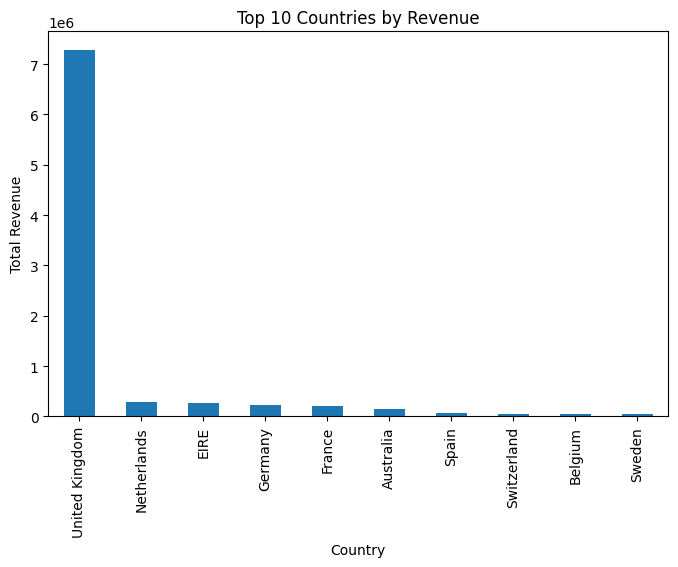

In [23]:
# Calculate total sales by country
country_sales = (
    df.groupby("Country")["TotalSales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Plot top countries by sales
plt.figure(figsize=(8,5))
country_sales.plot(kind="bar")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.show()


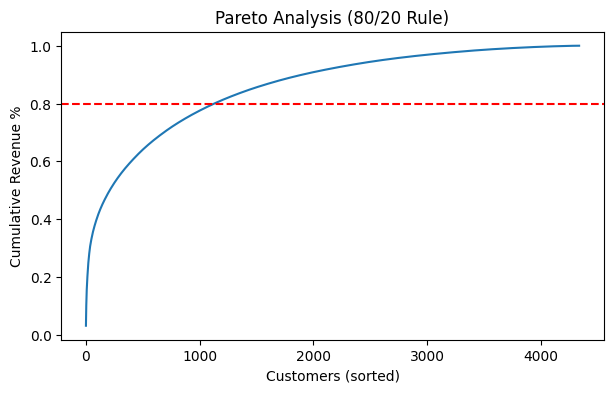

In [24]:
# Calculate total sales per customer
customer_sales = df.groupby("CustomerID")["TotalSales"].sum()

# Sort customers by sales descending
customer_sales_sorted = customer_sales.sort_values(ascending=False)

# Calculate cumulative revenue percentage
cumulative_revenue = customer_sales_sorted.cumsum() / customer_sales_sorted.sum()

# Plot Pareto curve
plt.figure(figsize=(7,4))
plt.plot(cumulative_revenue.values)
plt.axhline(y=0.8, color="r", linestyle="--")
plt.title("Pareto Analysis (80/20 Rule)")
plt.xlabel("Customers (sorted)")
plt.ylabel("Cumulative Revenue %")
plt.show()
